# 1. Load the Dataset

In [22]:
import numpy as np
dataset = np.loadtxt('xor.txt', delimiter=',')
TrainX = dataset[:,0:2]
TrainY = dataset[:,2]
TrainX, TrainY

(array([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]]),
 array([0., 1., 1., 0.]))

In [23]:
def XORNeuralNetwork(TrainX, TrainY, Activation, Optimizer, Loss, learning_rate, Epochs, BatchSize):
    # Model Building
    from tensorflow.keras.layers import Input, Dense
    from tensorflow.keras.models import Model
    input_tensor = Input(shape=(2,))
    hidden_tensor = Dense(2, activation=Activation)(input_tensor)
    output_tensor = Dense(1, activation=Activation)(hidden_tensor)

    # Model Compiling and Learning
    model = Model(input_tensor, output_tensor)
    model.compile(optimizer=Optimizer(learning_rate=learning_rate), loss=Loss)
    history = model.fit(TrainX, TrainY, epochs=Epochs, batch_size=BatchSize)

    # Model Output
    output = model.predict(TrainX)
    output = np.concatenate((TrainX, output), axis=1)

    metadata = {'Optimizer': Optimizer, 'Activation': Activation, 'Loss': Loss, 'learning_rate': learning_rate, 'Epochs': Epochs, 'BatchSize': BatchSize}

    return (history, metadata, output)

In [24]:
def PlotLoss(histories):
    import matplotlib.pyplot as plt
    import pandas as pd

    for result in histories:
        pd.DataFrame(result[0].history).plot(figsize=(8, 5))
        plt.title(f'{result[1]["Optimizer"].__name__} - {result[1]["Activation"]}')
        plt.grid(True)
        plt.gca().set_ylim(0, 1)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')

    plt.show()

def printOutput(Histories):
    for result in Histories:
        print(f'{result[1]["Optimizer"].__name__} - {result[1]["Activation"]}')
        print(result[2])
        print()

In [25]:
from tensorflow.keras.optimizers import SGD, Adam
Optimizers = [SGD, Adam]
Activations = ['relu', 'tanh', 'sigmoid', 'hard_sigmoid']

Histories = []
for Optimizer in Optimizers:
    for Activation in Activations:
        Histories.append(XORNeuralNetwork(TrainX,TrainY, Activation, Optimizer, 'mean_squared_error', 0.1, 500, 1))


Epoch 1/500
4/4 [==============================] - 0s 1ms/step - loss: 0.5013
Epoch 2/500
4/4 [==============================] - 0s 998us/step - loss: 0.4320
Epoch 3/500
4/4 [==============================] - 0s 667us/step - loss: 0.4031
Epoch 4/500
4/4 [==============================] - 0s 1ms/step - loss: 0.3554
Epoch 5/500
4/4 [==============================] - 0s 999us/step - loss: 0.3337
Epoch 6/500
4/4 [==============================] - 0s 1000us/step - loss: 0.3327
Epoch 7/500
4/4 [==============================] - 0s 998us/step - loss: 0.2819
Epoch 8/500
4/4 [==============================] - 0s 666us/step - loss: 0.2857
Epoch 9/500
4/4 [==============================] - 0s 667us/step - loss: 0.2629
Epoch 10/500
4/4 [==============================] - 0s 1ms/step - loss: 0.2633
Epoch 11/500
4/4 [==============================] - 0s 1000us/step - loss: 0.2540
Epoch 12/500
4/4 [==============================] - 0s 666us/step - loss: 0.2522
Epoch 13/500
4/4 [=======================

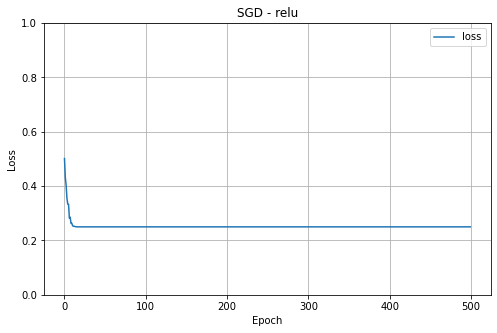

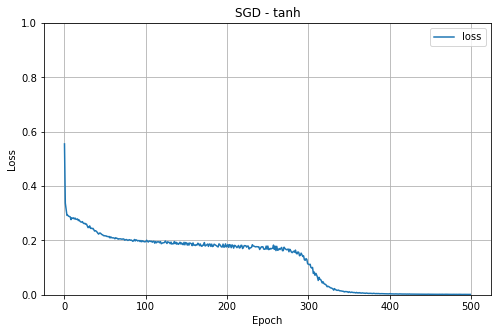

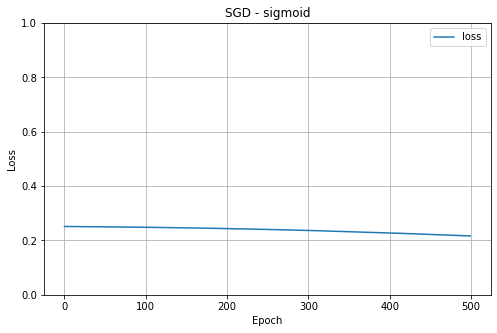

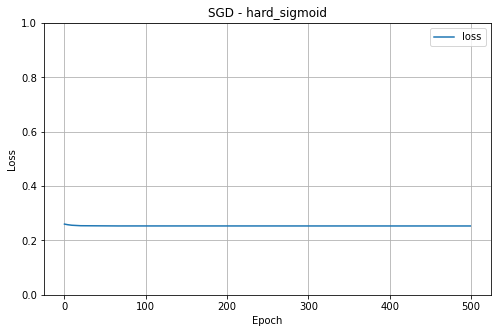

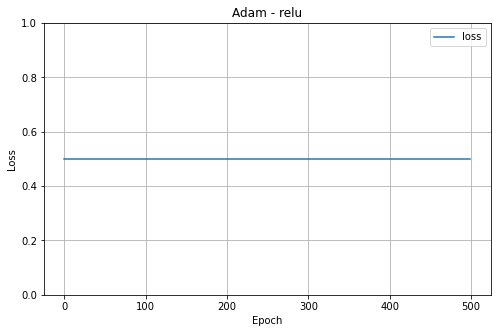

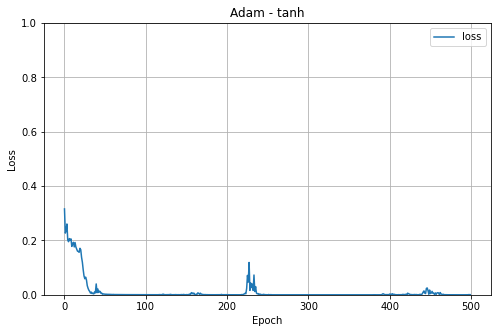

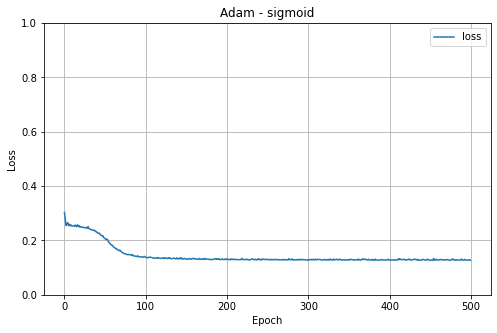

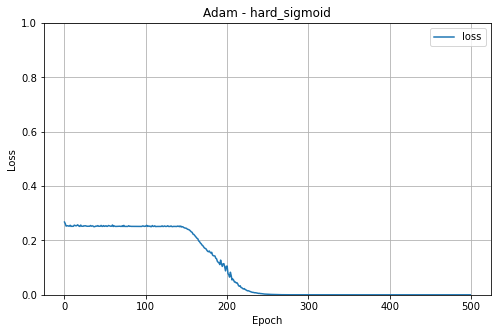

In [26]:
PlotLoss(Histories)

In [27]:
printOutput(Histories)

SGD - relu
[[0. 0. 0.]
 [0. 1. 1.]
 [1. 0. 0.]
 [1. 1. 0.]]

SGD - tanh
[[ 0.00000000e+00  0.00000000e+00  9.12487216e-04]
 [ 0.00000000e+00  1.00000000e+00  9.47330296e-01]
 [ 1.00000000e+00  0.00000000e+00  9.48378623e-01]
 [ 1.00000000e+00  1.00000000e+00 -1.40319783e-02]]

SGD - sigmoid
[[0.         0.         0.34161925]
 [0.         1.         0.53338504]
 [1.         0.         0.57226169]
 [1.         1.         0.57873982]]

SGD - hard_sigmoid
[[0.         0.         0.49172923]
 [0.         1.         0.50818628]
 [1.         0.         0.48985445]
 [1.         1.         0.50631148]]

Adam - relu
[[0. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 1. 0.]]

Adam - tanh
[[ 0.          0.          0.04216228]
 [ 0.          1.          0.99214482]
 [ 1.          0.          0.9919787 ]
 [ 1.          1.         -0.02151018]]

Adam - sigmoid
[[0.         0.         0.04708841]
 [0.         1.         0.98489654]
 [1.         0.         0.48813376]
 [1.         1.         0.4884125 ]]

Adam